Naman Raiyani

60009220057

D2-1

IPCV EXP 7

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

In [26]:
def erosion(image, se):
    img_height, img_width = image.shape
    se_height, se_width = se.shape
    se_center_y, se_center_x = se_height // 2, se_width // 2
    eroded_image = np.full_like(image, 255)

    for y in range(img_height):
        for x in range(img_width):
            local_min = 255

            for j in range(-se_center_y, se_center_y + 1):
                for i in range(-se_center_x, se_center_x + 1):
                    if se[j + se_center_y, i + se_center_x] == 1:
                        img_y = y + j
                        img_x = x + i

                        if 0 <= img_y < img_height and 0 <= img_x < img_width:
                            local_min = min(local_min, image[img_y, img_x])
            eroded_image[y, x] = local_min

    return eroded_image

In [27]:
def dilation(image, se):
    img_height, img_width = image.shape
    se_height, se_width = se.shape
    se_center_y, se_center_x = se_height // 2, se_width // 2
    dilated_image = np.zeros_like(image)

    for y in range(img_height):
        for x in range(img_width):
            local_max = 0

            for j in range(-se_center_y, se_center_y + 1):
                for i in range(-se_center_x, se_center_x + 1):
                    if se[j + se_center_y, i + se_center_x] == 1:
                        img_y = y + j
                        img_x = x + i

                        if 0 <= img_y < img_height and 0 <= img_x < img_width:
                            local_max = max(local_max, image[img_y, img_x])
            dilated_image[y, x] = local_max

    return dilated_image

In [28]:
def display_three_images(original, eroded, dilated, title1, title2, title3):
    plt.figure(figsize=(24, 8))

    plt.subplot(1, 3, 1)
    plt.title(title1)
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(title2)
    plt.imshow(eroded, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title(title3)
    plt.imshow(dilated, cmap='gray')
    plt.axis('off')

    plt.show()

In [29]:
image_path1 = '/content/drive/MyDrive/Colab Notebooks/IPCV/12.jpg'
original_image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)

In [30]:
se = np.array([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])

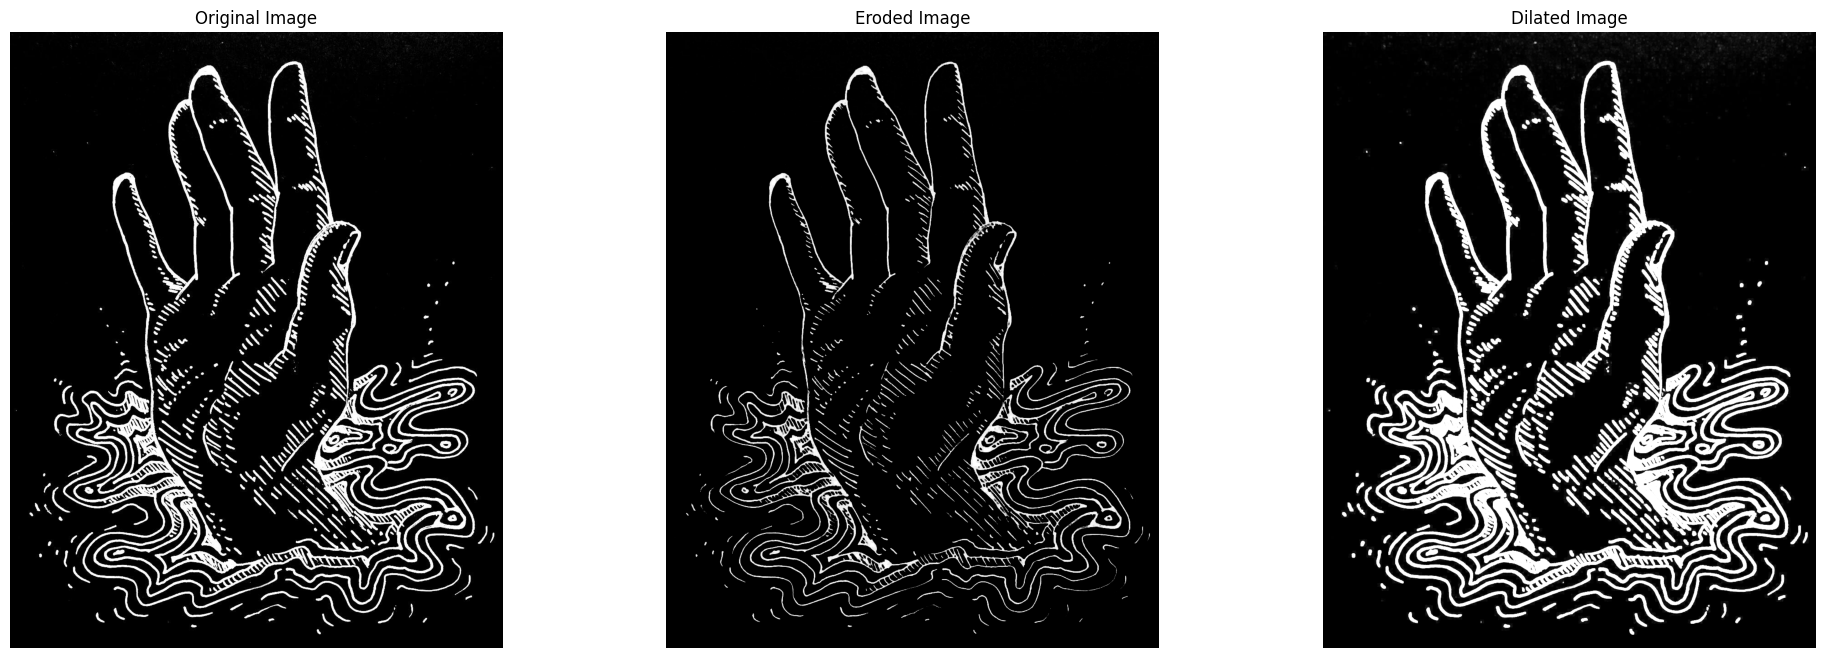

In [31]:
eroded_image1 = erosion(original_image1, se)
dilated_image1 = dilation(original_image1, se)
display_three_images(original_image1, eroded_image1, dilated_image1,
                         'Original Image', 'Eroded Image', 'Dilated Image')

In [32]:
image_path2 = '/content/drive/MyDrive/Colab Notebooks/IPCV/9.jpg'
original_image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

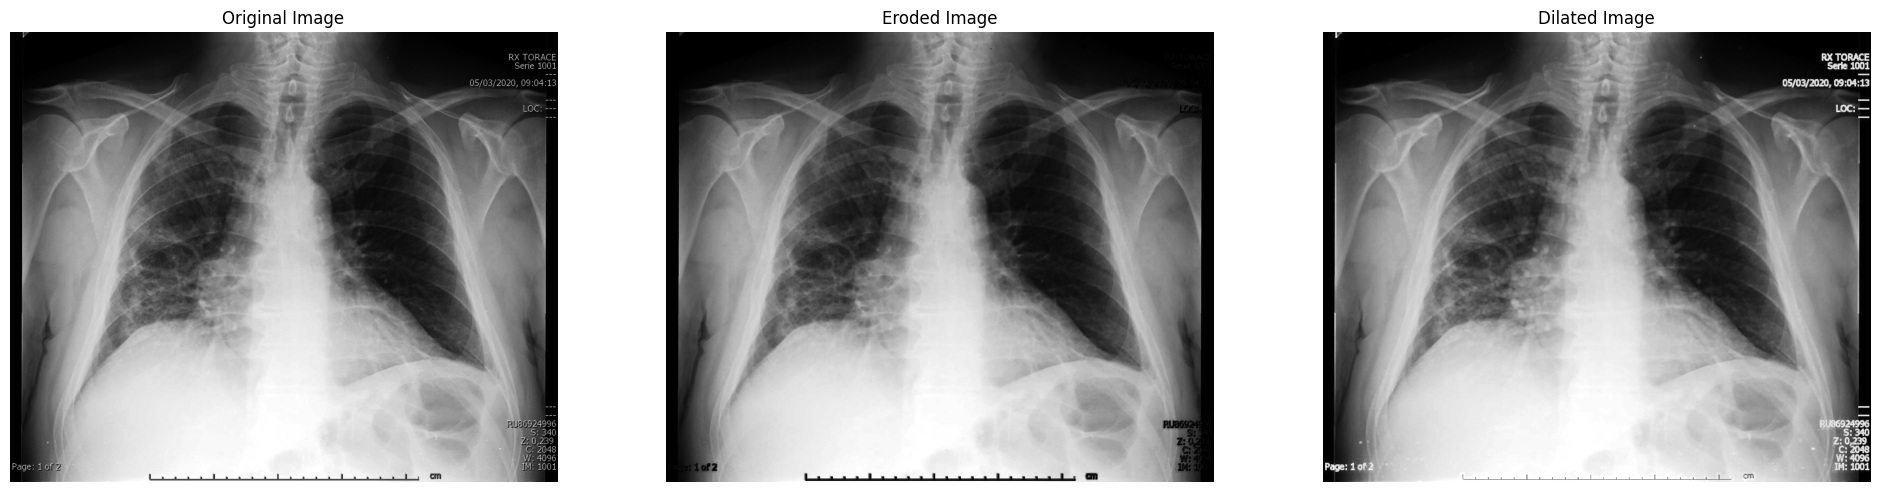

In [34]:
eroded_image2 = erosion(original_image2, se)
dilated_image2 = dilation(original_image2, se)
display_three_images(original_image2, eroded_image2, dilated_image2,
                         'Original Image', 'Eroded Image', 'Dilated Image')

In [35]:
def opening(image, se):
    return dilation(erosion(image, se), se)

In [36]:
def closing(image, se):
    return erosion(dilation(image, se), se)

In [37]:
def hit_and_miss(image, se, background):
    img_height, img_width = image.shape
    se_height, se_width = se.shape
    se_center_y, se_center_x = se_height // 2, se_width // 2
    hit_miss_image = np.zeros_like(image)

    for y in range(img_height):
        for x in range(img_width):
            match = True

            for j in range(-se_center_y, se_center_y + 1):
                for i in range(-se_center_x, se_center_x + 1):
                    if se[j + se_center_y, i + se_center_x] == 1:
                        img_y = y + j
                        img_x = x + i

                        if 0 <= img_y < img_height and 0 <= img_x < img_width:
                            if image[img_y, img_x] == 0:
                                match = False
                    elif se[j + se_center_y, i + se_center_x] == 0:
                        img_y = y + j
                        img_x = x + i

                        if 0 <= img_y < img_height and 0 <= img_x < img_width:
                            if image[img_y, img_x] != background:
                                match = False
            if match:
                hit_miss_image[y, x] = 255

    return hit_miss_image

In [38]:
opened_image1 = opening(original_image1, se)
closed_image1 = closing(original_image1, se)

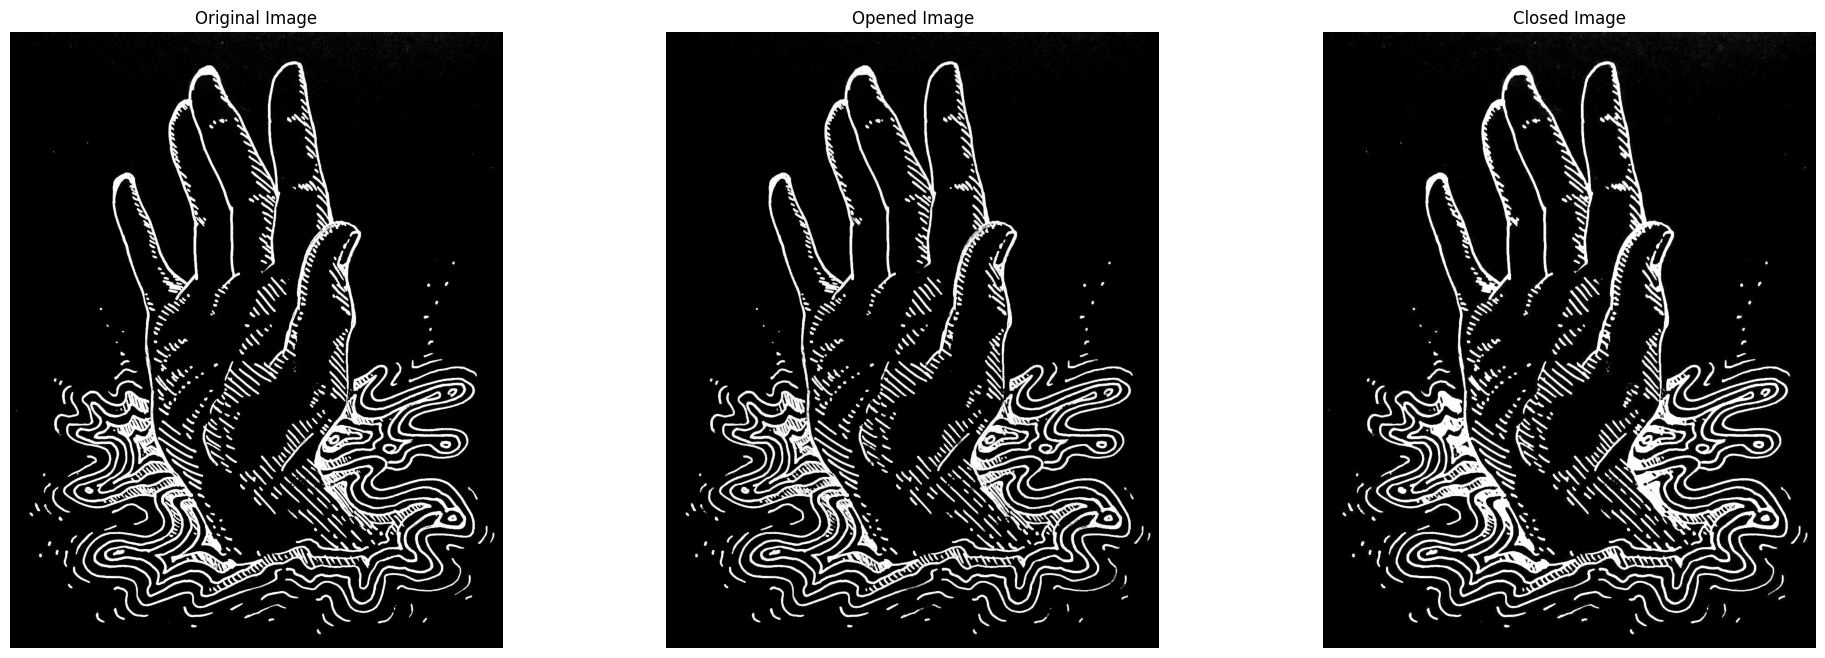

In [39]:
display_three_images(original_image1,
                     opened_image1, closed_image1,
                     'Original Image',
                     'Opened Image', 'Closed Image')

In [40]:
se_neg = np.where(se == 1, 0, 1)
hit_miss_image1 = hit_and_miss(original_image1, se_neg, 0)

In [41]:
def display_two_images(original, modified, title1, title2):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(modified, cmap='gray')
    plt.axis('off')

    plt.show()

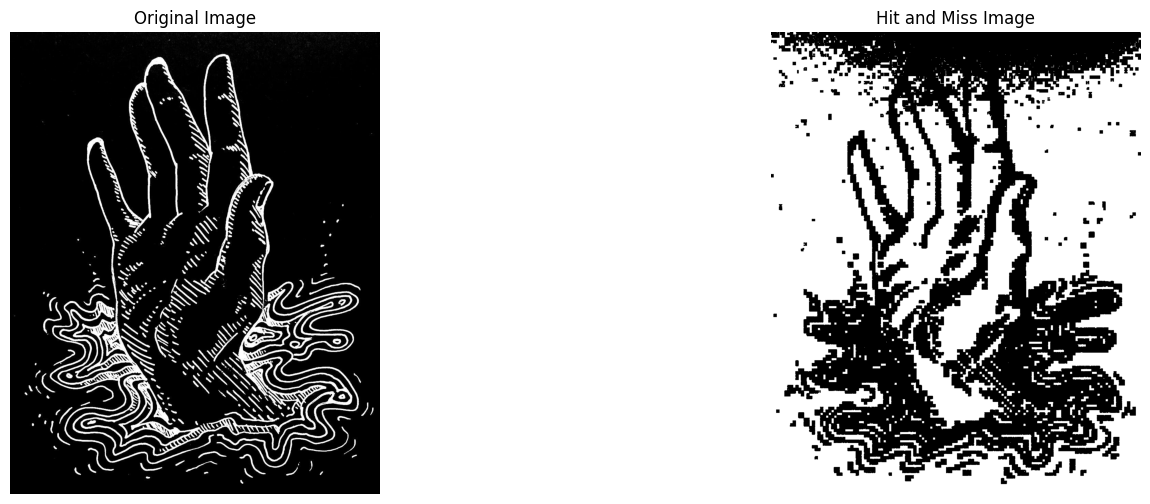

In [42]:
display_two_images(original_image1, hit_miss_image1, 'Original Image', 'Hit and Miss Image')

In [43]:
opened_image2 = opening(original_image2, se)
closed_image2 = closing(original_image2, se)

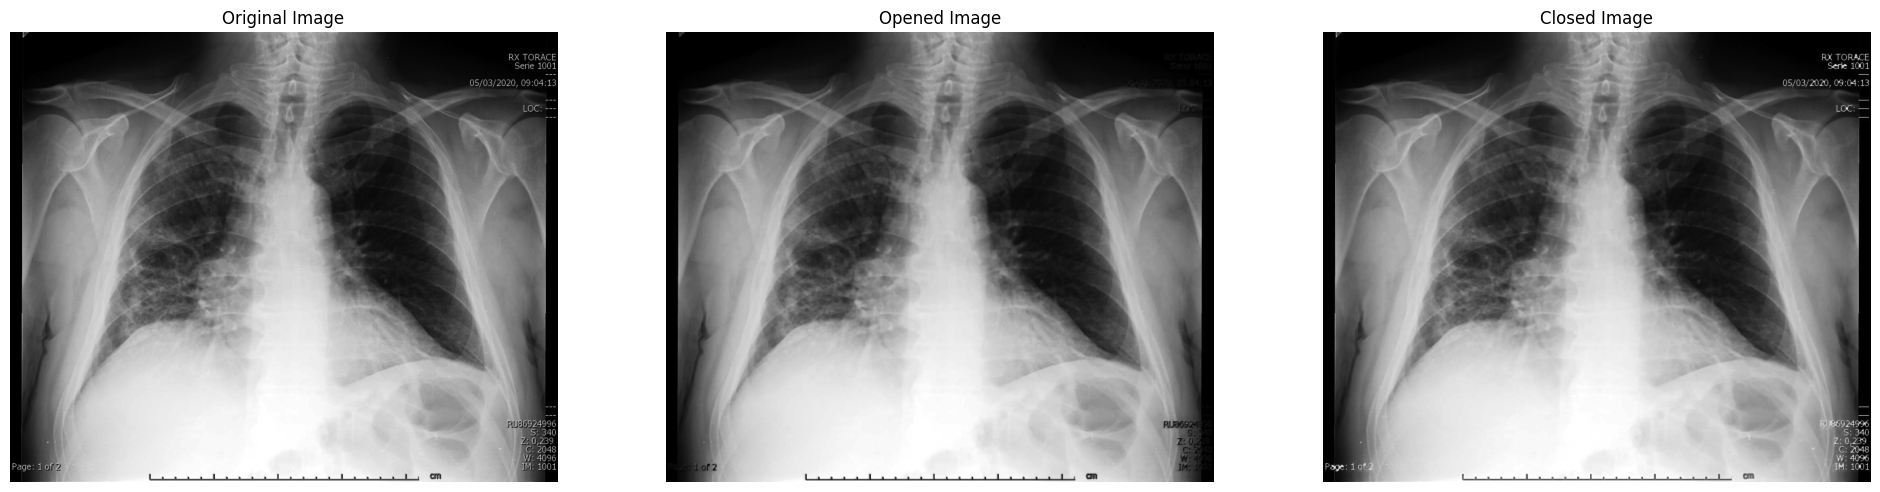

In [44]:
display_three_images(original_image2,
                     opened_image2, closed_image2,
                     'Original Image',
                     'Opened Image', 'Closed Image')

In [45]:
hit_miss_image2 = hit_and_miss(original_image2, se_neg, 0)

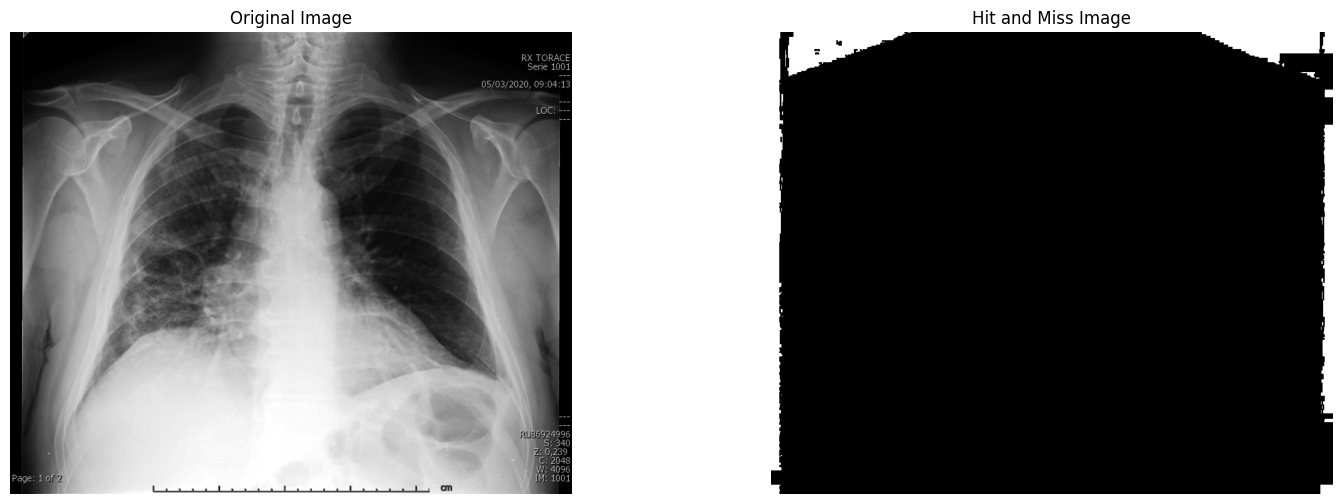

In [46]:
display_two_images(original_image2, hit_miss_image2, 'Original Image', 'Hit and Miss Image')

In [49]:
def erosion_color(image, se):
    img_height, img_width, _ = image.shape
    se_height, se_width = se.shape
    se_center_y, se_center_x = se_height // 2, se_width // 2
    eroded_image = np.full_like(image, 255)

    for y in range(img_height):
        for x in range(img_width):
            for channel in range(3):
                local_min = 255
                for j in range(-se_center_y, se_center_y + 1):
                    for i in range(-se_center_x, se_center_x + 1):
                        if se[j + se_center_y, i + se_center_x] == 1:
                            img_y, img_x = y + j, x + i
                            if 0 <= img_y < img_height and 0 <= img_x < img_width:
                                local_min = min(local_min, image[img_y, img_x, channel])
                eroded_image[y, x, channel] = local_min

    return eroded_image

In [50]:
def dilation_color(image, se):
    img_height, img_width, _ = image.shape
    se_height, se_width = se.shape
    se_center_y, se_center_x = se_height // 2, se_width // 2
    dilated_image = np.zeros_like(image)

    for y in range(img_height):
        for x in range(img_width):
            for channel in range(3):
                local_max = 0
                for j in range(-se_center_y, se_center_y + 1):
                    for i in range(-se_center_x, se_center_x + 1):
                        if se[j + se_center_y, i + se_center_x] == 1:
                            img_y, img_x = y + j, x + i
                            if 0 <= img_y < img_height and 0 <= img_x < img_width:
                                local_max = max(local_max, image[img_y, img_x, channel])
                dilated_image[y, x, channel] = local_max

    return dilated_image

In [51]:
def opening_color(image, se):
    return dilation_color(erosion_color(image, se), se)

In [52]:
def closing_color(image, se):
    return erosion_color(dilation_color(image, se), se)

In [53]:
def hit_and_miss_color(image, se, background):
    img_height, img_width, _ = image.shape
    se_height, se_width = se.shape
    se_center_y, se_center_x = se_height // 2, se_width // 2
    hit_miss_image = np.zeros_like(image)

    for y in range(img_height):
        for x in range(img_width):
            match = True
            for j in range(-se_center_y, se_center_y + 1):
                for i in range(-se_center_x, se_center_x + 1):
                    if se[j + se_center_y, i + se_center_x] == 1:
                        img_y, img_x = y + j, x + i
                        if 0 <= img_y < img_height and 0 <= img_x < img_width:
                            if image[img_y, img_x].max() == 0:
                                match = False
                    else:
                        img_y, img_x = y + j, x + i
                        if 0 <= img_y < img_height and 0 <= img_x < img_width:
                            if (image[img_y, img_x] != background).any():
                                match = False
            if match:
                hit_miss_image[y, x] = [255, 255, 255]

    return hit_miss_image

In [54]:
def display_color_images(original, modified, title1, title2):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(cv2.cvtColor(modified, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

In [55]:
image_path3 = '/content/drive/MyDrive/Colab Notebooks/IPCV/13.jpg'
original_image3 = cv2.imread(image_path3)

In [56]:
se = np.array([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])

In [57]:
eroded_image3 = erosion_color(original_image3, se)
dilated_image3 = dilation_color(original_image3, se)
opened_image3 = opening_color(original_image3, se)
closed_image3 = closing_color(original_image3, se)

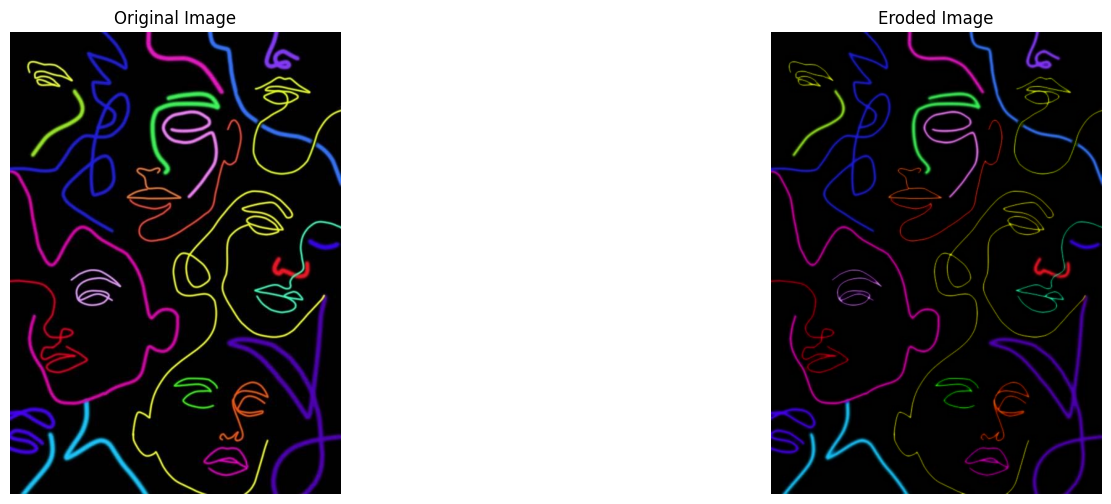

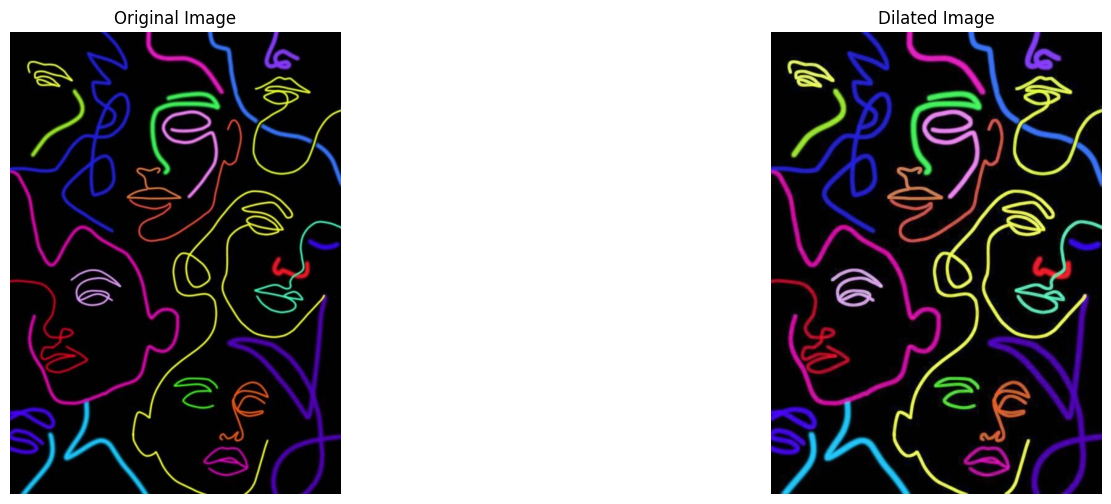

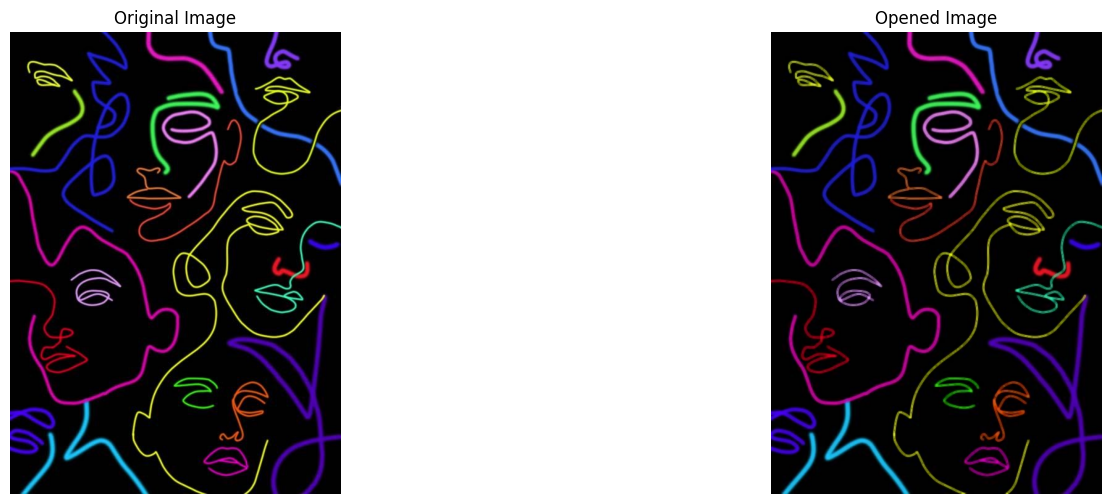

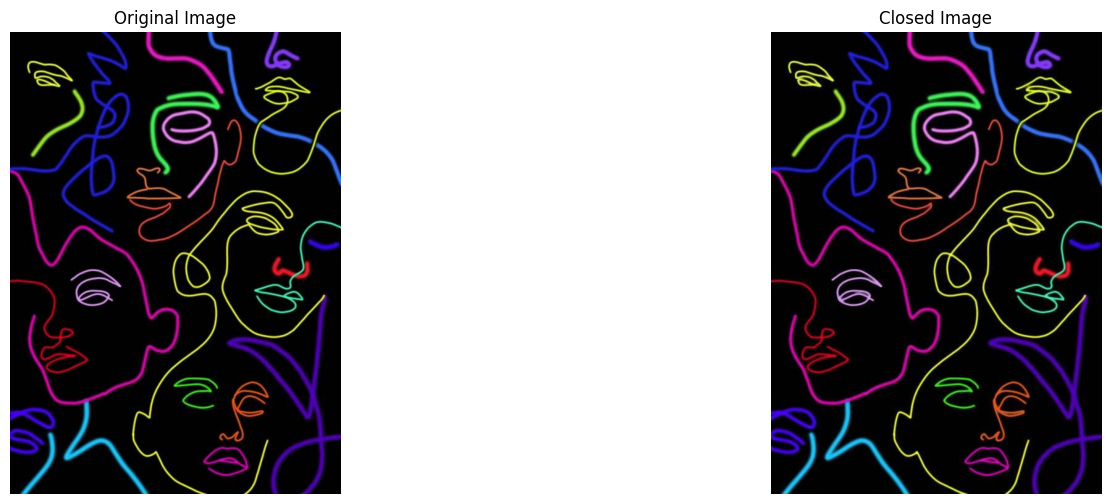

In [58]:
display_color_images(original_image3, eroded_image3, 'Original Image', 'Eroded Image')
display_color_images(original_image3, dilated_image3, 'Original Image', 'Dilated Image')
display_color_images(original_image3, opened_image3, 'Original Image', 'Opened Image')
display_color_images(original_image3, closed_image3, 'Original Image', 'Closed Image')

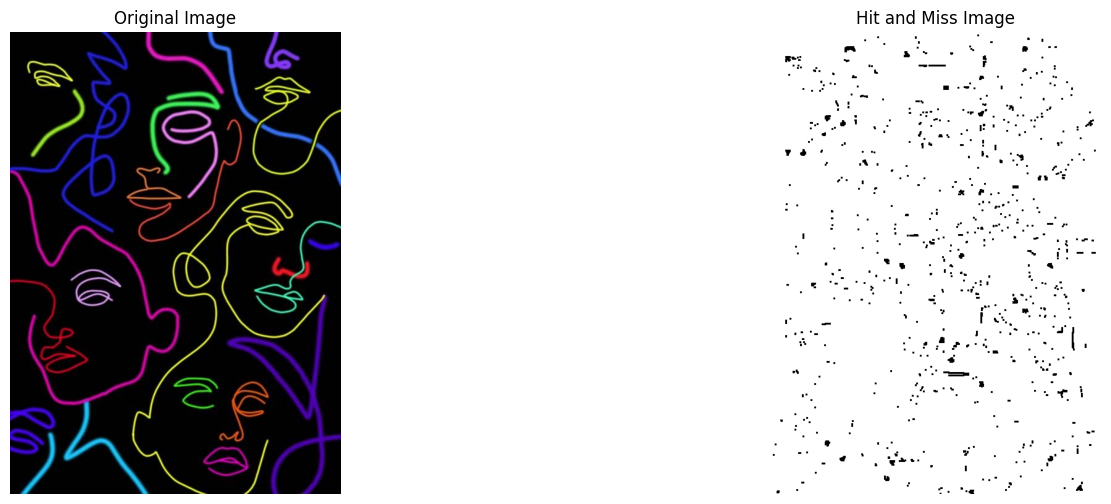

In [63]:
se_neg = np.where(se == 1, 1, 0)
hit_miss_image3 = hit_and_miss_color(original_image3, se_neg, [255, 255, 255])

display_color_images(original_image3, hit_miss_image3, 'Original Image', 'Hit and Miss Image')

Observations
In this experiment, various morphological operations were applied to the image using a small structuring element, which was the negation of the previously used one.

Erosion: This operation reduced the size of the foreground objects, effectively eroding away boundaries. As a result, thin structures might disappear, and small noise could be eliminated.

Dilation: In contrast to erosion, dilation expanded the foreground objects, causing them to grow. This operation connected nearby structures and filled small holes, enhancing the overall visibility of the objects.

Opening: By performing erosion followed by dilation, opening effectively removed small objects and noise while preserving the shape and size of larger objects. This resulted in a cleaner image with fewer artifacts.

Closing: The closing operation, which involved dilation followed by erosion, filled small holes and gaps within objects, resulting in a more solid appearance of the structures and enhancing their connectivity.

Hit-and-Miss Transformation: This operation revealed specific patterns based on the structuring element, highlighting areas where the structure and background conditions were met. The resulting image showed distinct features corresponding to the negation of the structuring element, providing insight into the spatial arrangement of the objects.

Applications:
Morphological operations have numerous applications across various fields:

Image Preprocessing: Operations like erosion and dilation are widely used to preprocess images for further analysis. For example, they can help remove noise or fill gaps in images captured by medical imaging devices.

Object Detection and Recognition: Opening and closing can enhance object shapes, making them more identifiable. This is particularly useful in applications such as character recognition and detecting objects in autonomous vehicles.

Feature Extraction: The hit-and-miss transformation helps extract specific features from images, which can be used in pattern recognition tasks, including texture analysis and shape detection in industrial inspection.

Medical Imaging: In healthcare, these operations can aid in identifying anatomical structures or abnormalities in radiographs, MRI scans, or CT images by refining image quality and clarity.

Biometric Systems: Morphological techniques are often employed in facial recognition, fingerprint recognition, and iris recognition to enhance feature extraction from biometric data.

Conclusion:
Morphological operations are powerful tools in image processing, enabling significant enhancements in the analysis and interpretation of visual data. By manipulating the shapes and structures within images using structuring elements, we can achieve various goals, such as noise reduction, shape preservation, and feature extraction. The experiments demonstrated how each operation uniquely influences the image, providing insights into the underlying structures. These techniques are essential for numerous practical applications in computer vision, medical imaging, and pattern recognition, making them invaluable in both academic research and industry practices.